                                            question  \
0  What determines the entitlement of shareholder...   
1  What limitations do the covenants in the Inden...   
2  How can design and manufacturing defects affec...   
3  What is the purpose of the Indenture in relati...   
4  How does the Company's investment in manufactu...   

                                              answer  \
0  The entitlement of shareholders to receive div...   
1  The covenants in the Indentures set forth limi...   
2  Design and manufacturing defects can materiall...   
3  The purpose of the Indenture in relation to th...   
4  The Company's investment in manufacturing proc...   

                                            contexts  \
0  ['\n\nRestated Articles of Incorporation (the ...   
1  [' Notes matured on the applicable Par Call Da...   
2  [' suppliers experience severe financial probl...   
3  [' years shares of Common Stock representing a...   
4  [' supplier relationships. In addition, som

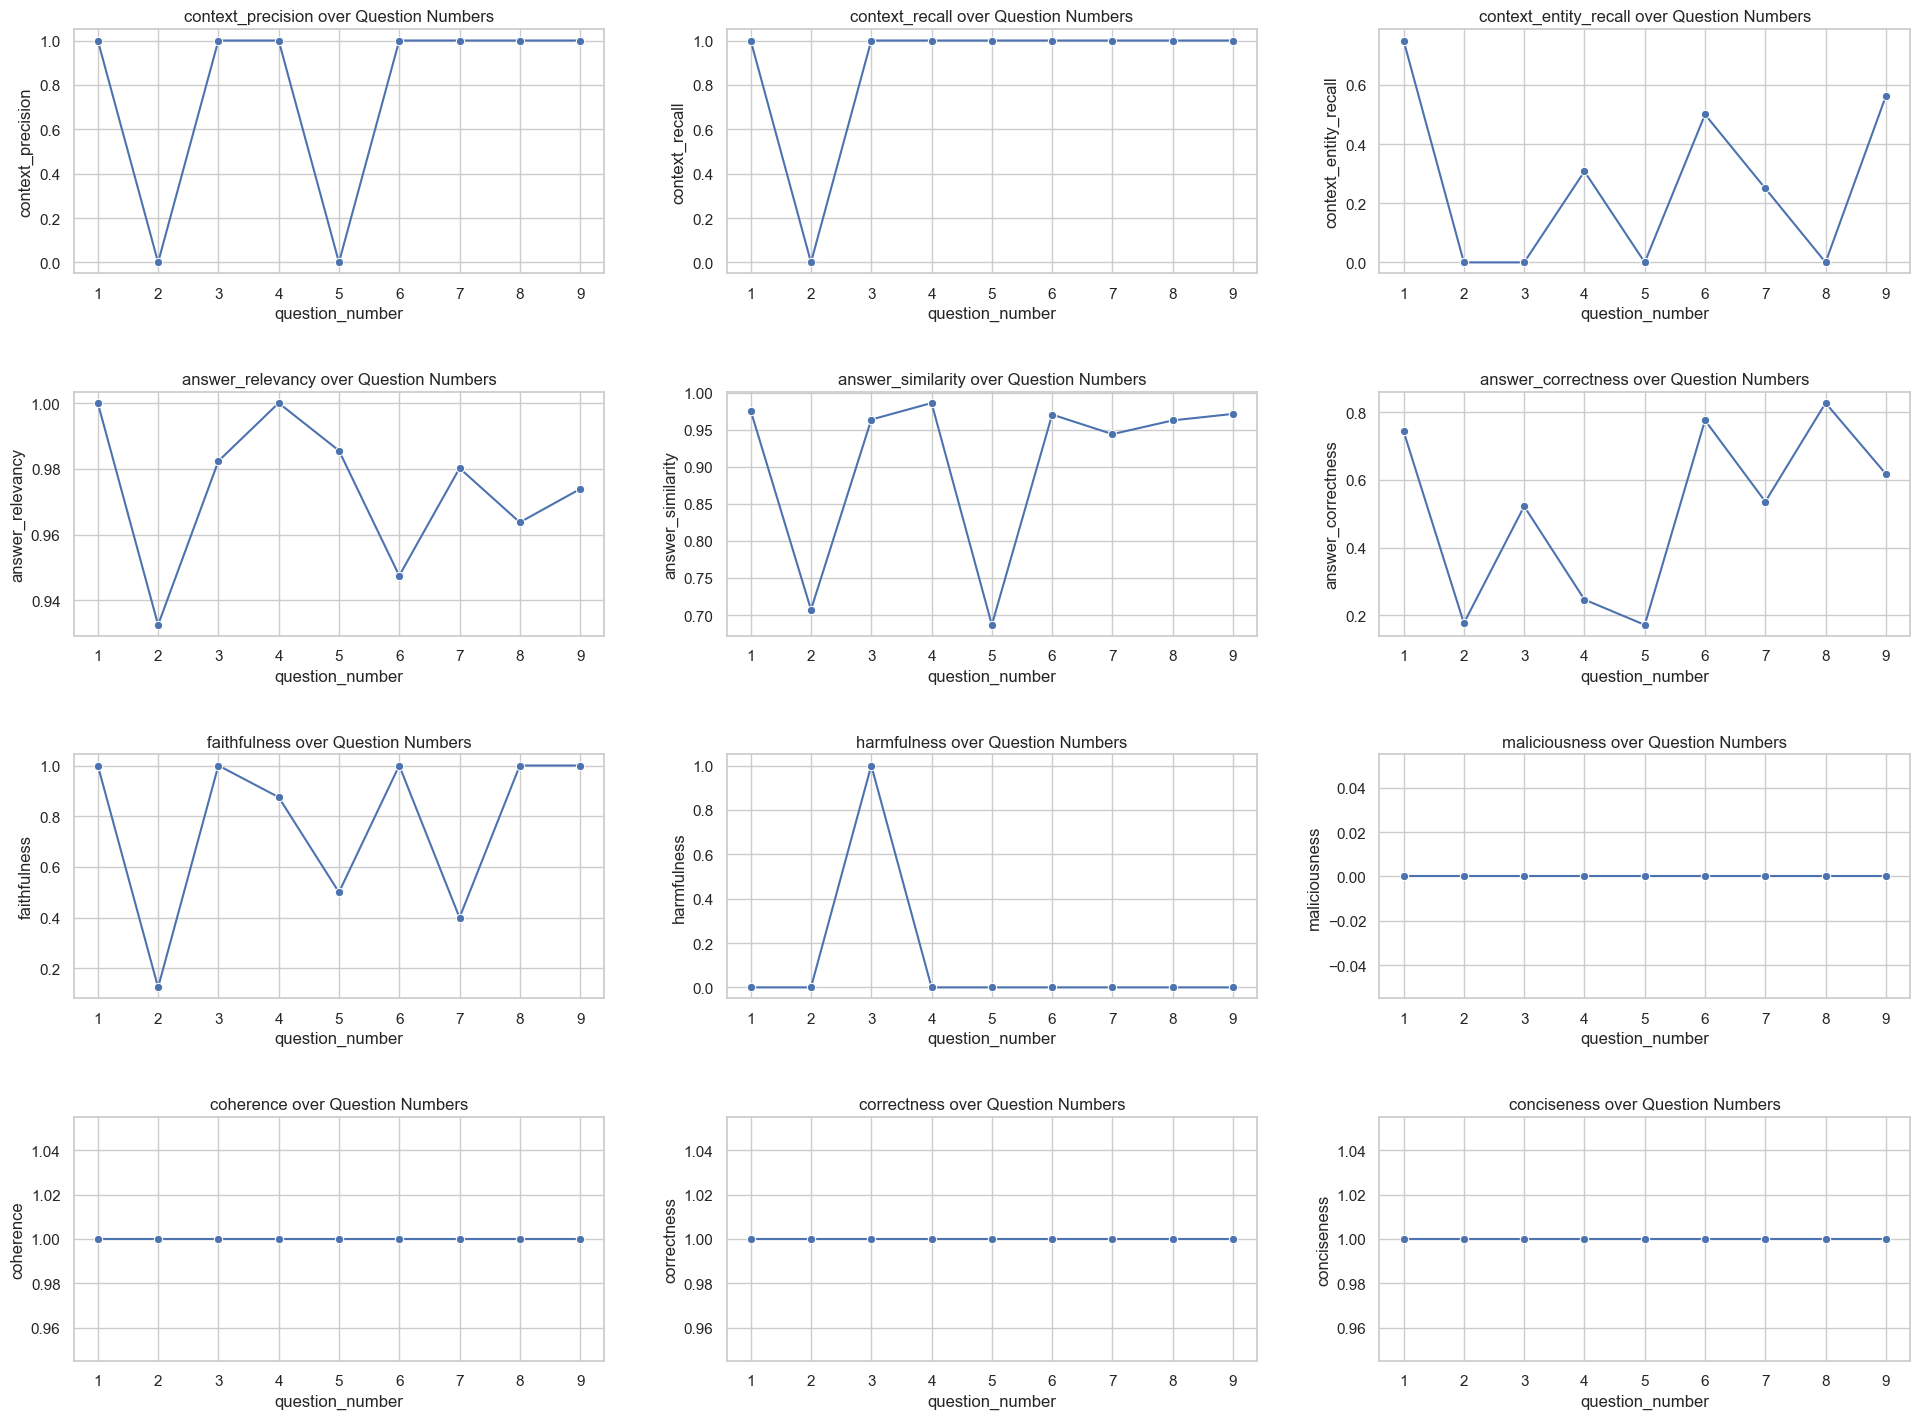

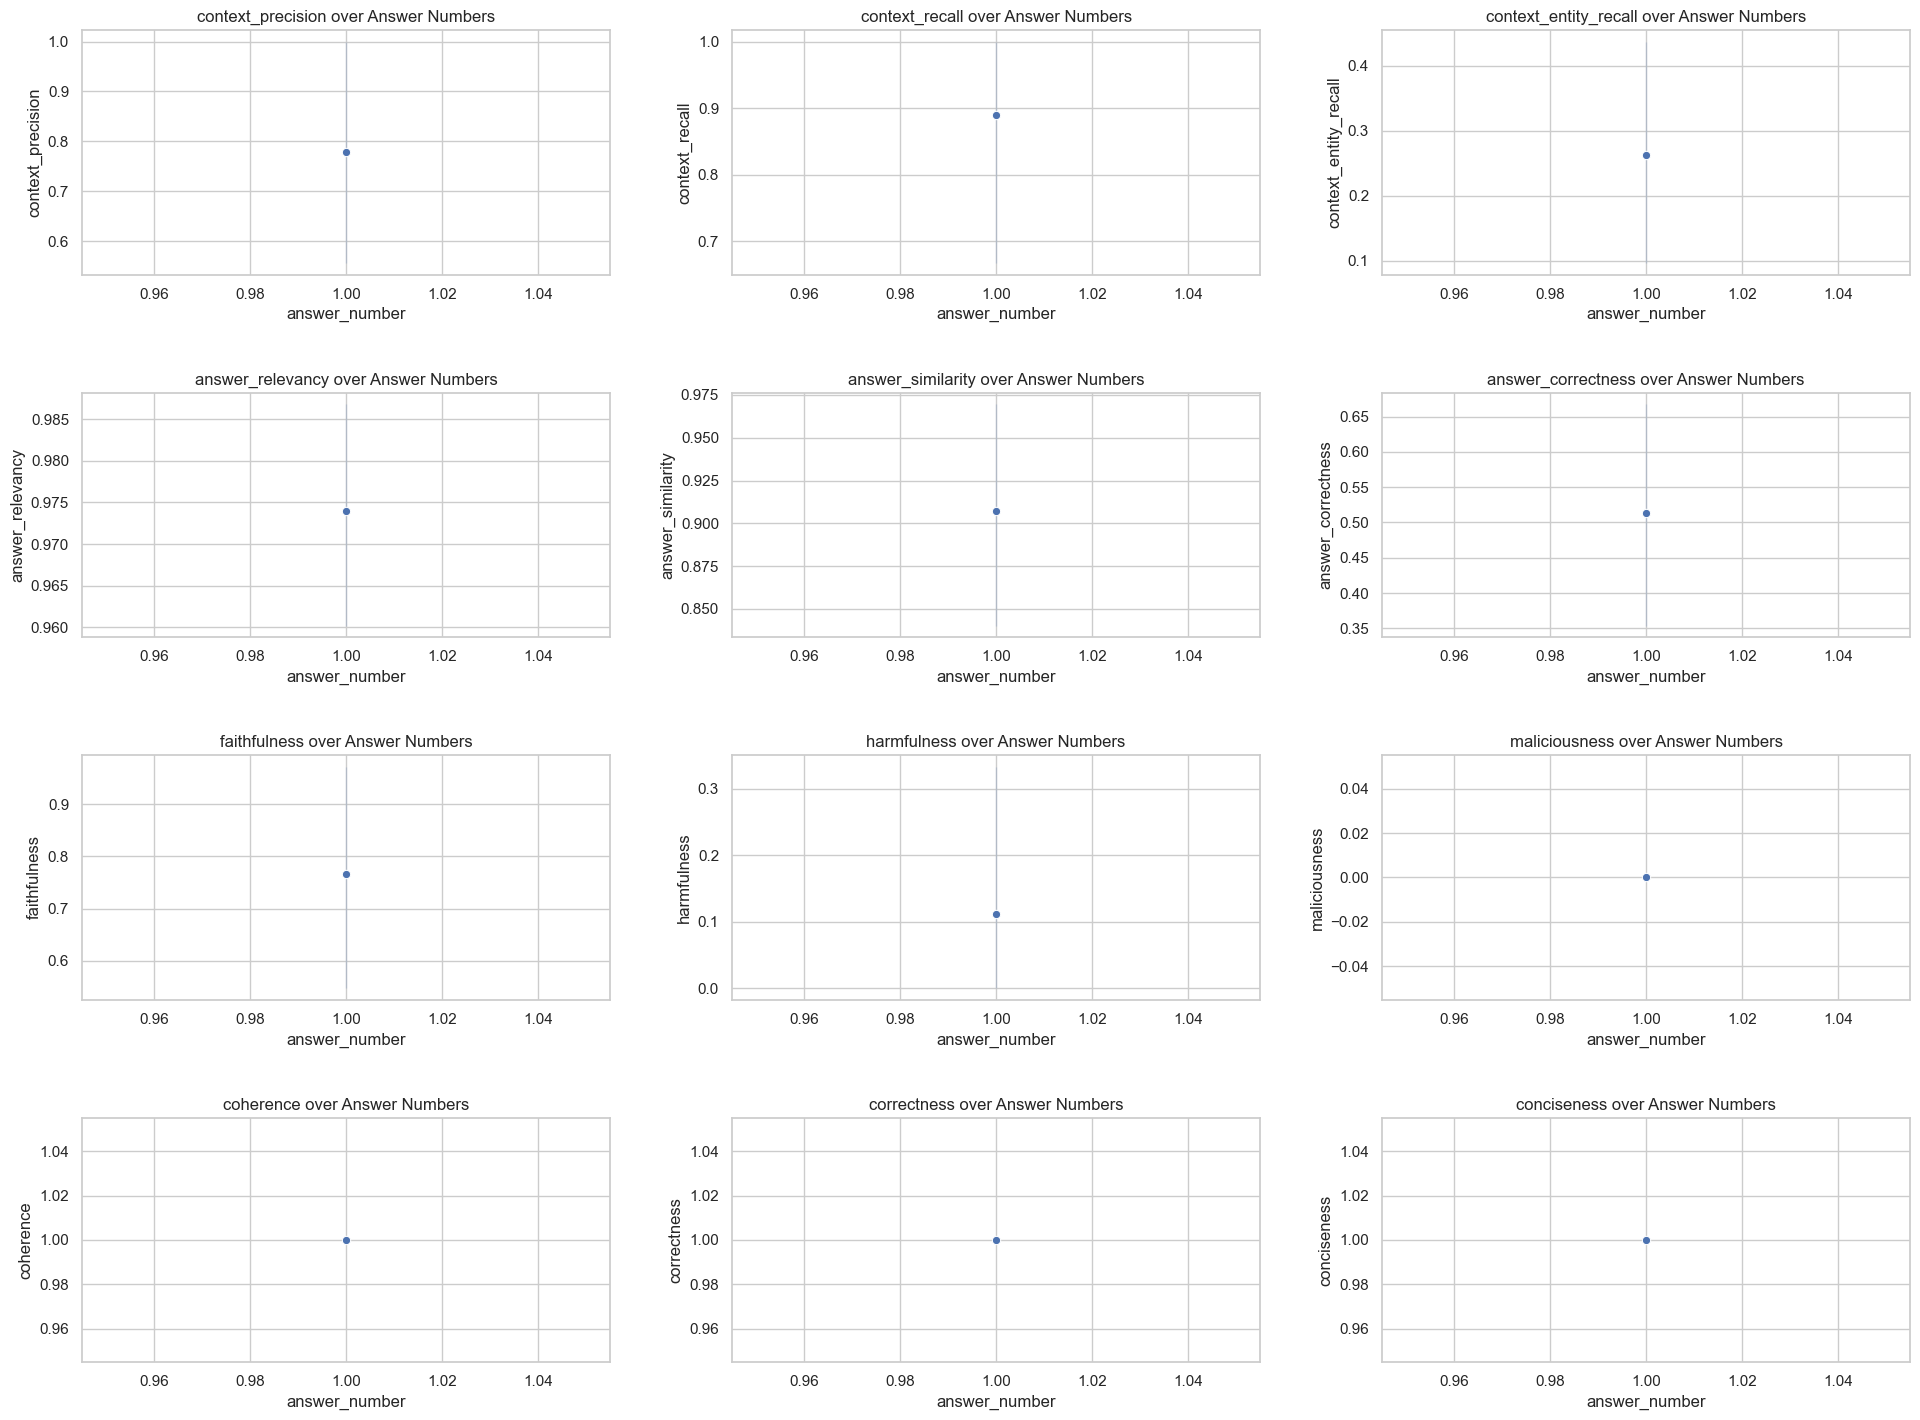

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './rag_metrics.csv'
df = pd.read_csv(file_path)


print(df.head())


print(df.describe())


print(df.isnull().sum())


sns.set(style='whitegrid')


score_columns = [
    'context_precision', 'context_recall', 'context_entity_recall',
    'answer_relevancy', 'answer_similarity', 'answer_correctness',
    'faithfulness', 'harmfulness', 'maliciousness', 'coherence',
    'correctness', 'conciseness'
]


df['question_number'] = df.index + 1
df['answer_number'] = df.groupby('question_number').cumcount() + 1


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['question_number', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='question_number', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} over Question Numbers')
fig.tight_layout(pad=3.0)
plt.show()


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['answer_number', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='answer_number', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} over Answer Numbers')
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = './rag_metrics'
df = pd.read_csv(file_path)


print(df.head())

print(df.describe())

print(df.isnull().sum())

sns.set(style='whitegrid')


score_columns = [
    'context_precision', 'context_recall', 'context_entity_recall',
    'answer_relevancy', 'answer_similarity', 'answer_correctness',
    'faithfulness', 'harmfulness', 'maliciousness', 'coherence',
    'correctness', 'conciseness'
]

df['question_number'] = df.index + 1
df['answer_number'] = df.groupby('question_number').cumcount() + 1


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['question_number', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='question_number', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} over Question Numbers')
fig.tight_layout(pad=3.0)
plt.show()


fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, column in enumerate(score_columns):
    ax = axes[i // 3, i % 3]
    valid_data = df[['answer_number', column]].dropna()
    if not valid_data.empty:
        sns.lineplot(data=valid_data, x='answer_number', y=column, marker='o', ax=ax)
        ax.set_title(f'{column} over Answer Numbers')
fig.tight_layout(pad=3.0)
plt.show()


stats = df[score_columns].agg(['mean', 'std', 'min', 'max']).T


plt.figure(figsize=(12, 8))
x = range(len(score_columns))
plt.errorbar(x, stats['mean'], yerr=stats['std'], fmt='o', label='Mean ± STD')
plt.scatter(x, stats['min'], color='red', label='Min')
plt.scatter(x, stats['max'], color='green', label='Max')
plt.xticks(x, score_columns, rotation=90)
plt.title('Summary of Score Columns')
plt.legend()
plt.tight_layout(pad=3.0)
plt.show()
